<a href="https://colab.research.google.com/github/FaithOsamaye/Music-and-Mental-Health/blob/main/Music_and_Mental_Health1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
from google.colab import files
from IPython.display import Image

In [160]:
uploaded = files.upload()

Saving music_disk.jpg to music_disk.jpg


# **Introduction**

Music therapy, or MT, is the use of music to improve an individual's stress, mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.

However, MT employs a wide range of different genres, varying from one organization to the next.



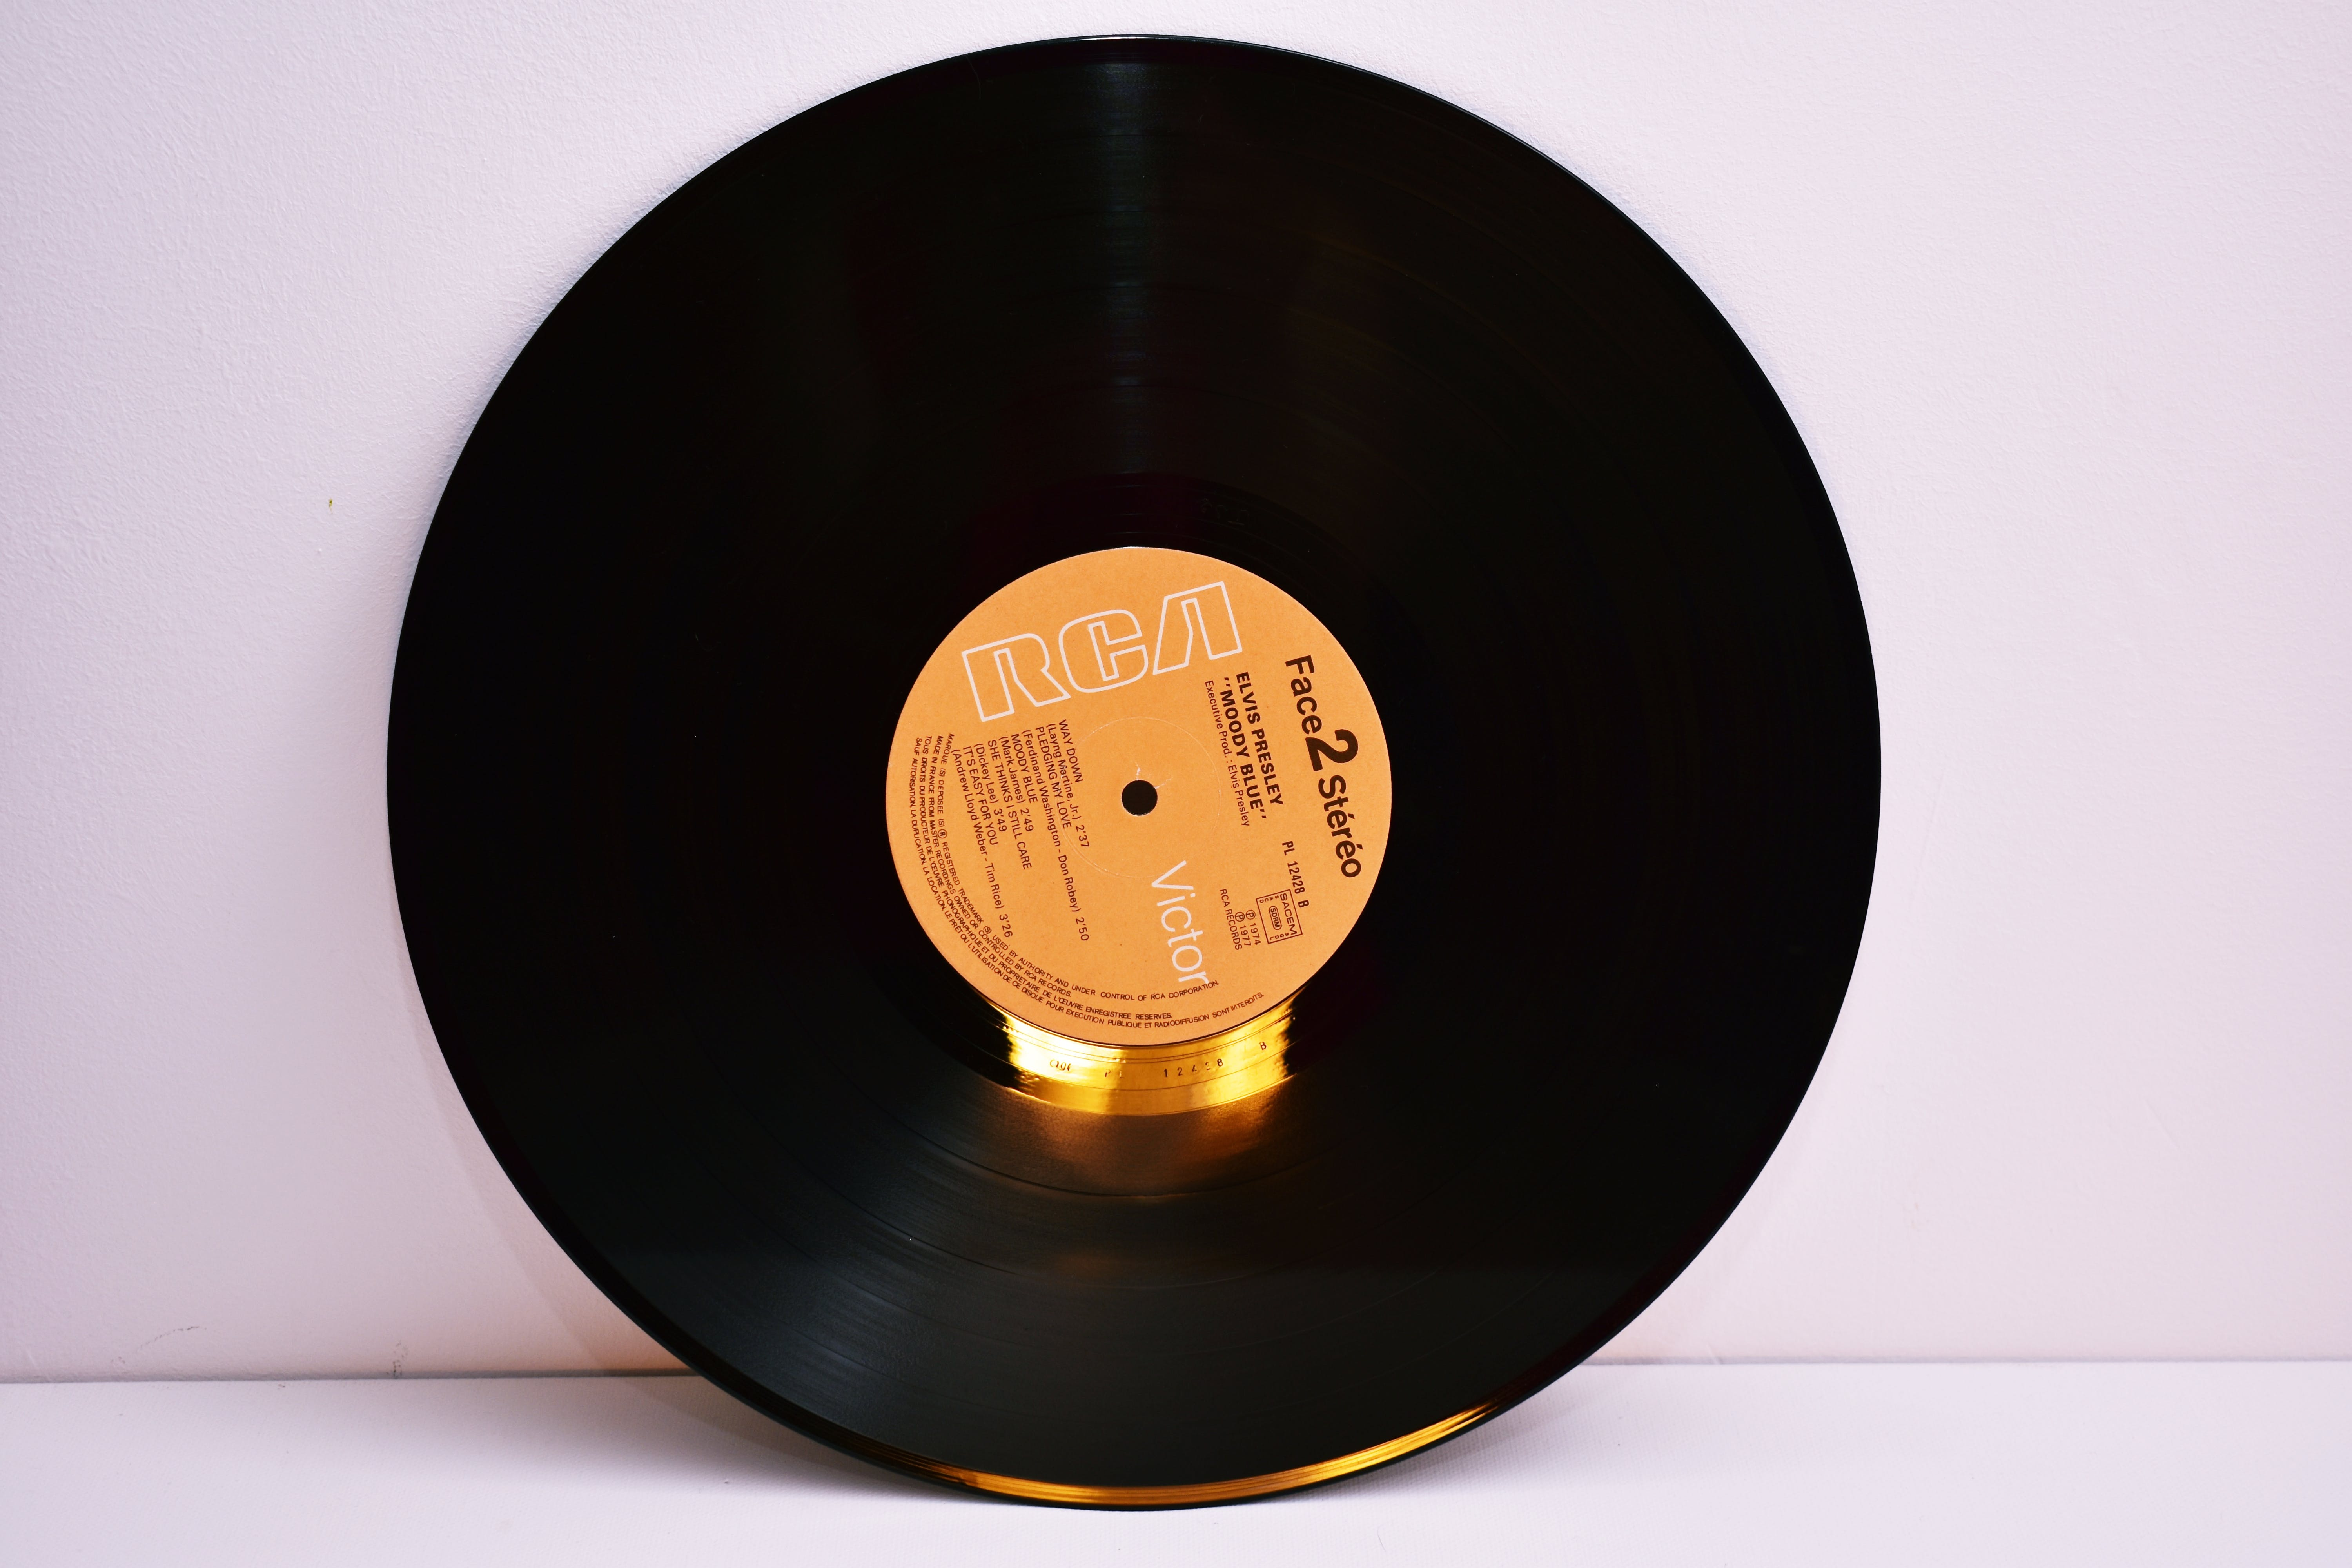

In [161]:
Image('music_disk.jpg',width=1200)

## **Problem Statement**

The dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('/content/mxmh_survey_results.csv', parse_dates = True)

df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


##**EDA**

In [4]:
df.shape

(736, 33)

In [5]:
df.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [7]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


## **Dropping Columns**

In [8]:
df2 = df.drop(['BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Permissions'], axis=1)

### **Handling Missing Data**

In [9]:
df2.isnull().sum()

Timestamp                    0
Age                          1
Primary streaming service    1
Hours per day                0
While working                3
Instrumentalist              4
Composer                     1
Fav genre                    0
Exploratory                  0
Foreign languages            4
Anxiety                      0
Depression                   0
Insomnia                     0
OCD                          0
Music effects                8
dtype: int64

<Axes: >

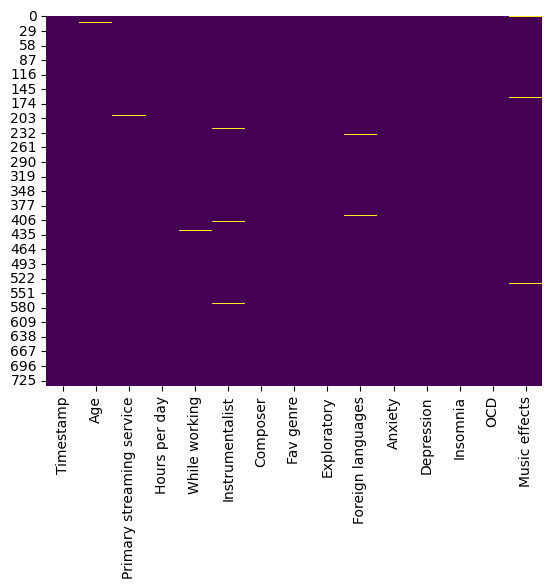

In [10]:
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')

In [11]:
age_fill = df2['Age'].mode().iloc[0]

df2['Age'].fillna(age_fill, inplace = True)

In [12]:
df2['Primary streaming service'] = df2['Primary streaming service'].ffill()

In [13]:
working_fill = df2['While working'].mode().iloc[0]

df2['While working'].fillna(working_fill, inplace = True)

In [14]:
instr_fill = df2['Instrumentalist'].mode().iloc[0]

df2['Instrumentalist'].fillna(instr_fill, inplace = True)


In [15]:
df2['Composer'] = df2['Composer'].bfill()

In [16]:
foreign = df2['Foreign languages'].mode().iloc[0]

df2['Foreign languages'].fillna(foreign , inplace = True)

In [17]:
music = df2['Music effects'].mode().iloc[0]

df2['Music effects'].fillna(music , inplace = True)

## **Incorrect data types**

In [20]:
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

### **Splitting the timestamp**

In [21]:
df2['Dates'] = pd.to_datetime(df2['Timestamp']).dt.date
df2['Time'] = pd.to_datetime(df2['Timestamp']).dt.time


## **Duplicates**

In [22]:
df2.duplicated().sum()

0

## **Outliers**

In [23]:
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3-Q1

In [24]:
print(f'The Q1 value is:', (Q1))
print(f'The Q2/IQR value is:', (IQR))
print(f'The Q3 value is:', (Q3))


The Q1 value is: 18.0
The Q2/IQR value is: 10.0
The Q3 value is: 28.0


In [25]:
lower_threshold = Q1 - 1.5*IQR
higher_threshold = Q3 + 1.5*IQR

In [26]:
print(f'The lower threshold value is:', (lower_threshold))
print(f'The higher threshold value is:', (higher_threshold))

The lower threshold value is: 3.0
The higher threshold value is: 43.0


In [27]:
#lets check for the outliers

outliers = df2[(df2['Age'] < lower_threshold) | (df2['Age'] > higher_threshold)]

outliers.shape

(59, 17)

<ipython-input-175-67fdbd447c79>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Age'>

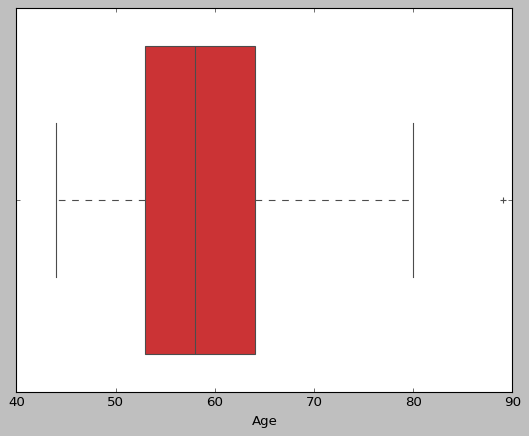

In [175]:
sns.boxplot(x = 'Age' ,data=outliers,palette='Set1')

## **Extracting Month and Year from the date column**

In [29]:
df2['Year'] = pd.DatetimeIndex(df2['Dates']).year
df2['Month'] = pd.DatetimeIndex(df2['Dates']).month
df2['Day'] = pd.DatetimeIndex(df2['Dates']).day_name

In [30]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['Month'] = df2['Month'].dt.month_name()

In [31]:
df2['Day'] = df2['Timestamp'].dt.day_name()

In [32]:
df2['Hour'] = df2['Timestamp'].dt.hour

In [34]:
##Grouping the hours the respondent filed the survey
bins= [0, 4,8, 12, 16, 24]

labels = ['Early Morning(0-4)','Morning(5-11)', 'Afternoon(12-16)', 'Evening(17-20)', 'Night(21+)']

df2['Respondent_pace'] = pd.cut(df2['Hour'], bins=bins, labels=labels)

In [35]:
df_clean =df2.drop(['Timestamp','Time','Hour','Dates'], axis=1)

In [37]:
df_clean = df_clean.dropna()

In [38]:
df_clean.isnull().any()

Age                          False
Primary streaming service    False
Hours per day                False
While working                False
Instrumentalist              False
Composer                     False
Fav genre                    False
Exploratory                  False
Foreign languages            False
Anxiety                      False
Depression                   False
Insomnia                     False
OCD                          False
Music effects                False
Year                         False
Month                        False
Day                          False
Respondent_pace              False
dtype: bool

In [40]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [52]:
plt.style.use('classic')

# **Questions and Answers**

**1. What is the age distribution like?**

In [41]:
age_bin = [0,10,30,50,70,90]

age_labels = ['Child(0-12)','Teen(13-19)','Adult(20-39)','MiddleAge_Adult(40-59)','Senior Adult(60-90)']

df_clean['Age_range'] = pd.cut(df_clean['Age'], bins=age_bin, labels = age_labels)

In [42]:
import plotly.express as px
age_grouped = df_clean['Age_range'].value_counts()
fig = px.pie(df, values=age_grouped.values, names=age_grouped.index, color_discrete_sequence=px.colors.sequential.Burg_r)
fig.show()

**Insight**: It seems as tho teenagers constitutes about 80 percent of our data.

**2. What age_range liked to explore?**

Text(0.5, 0, 'Age range')

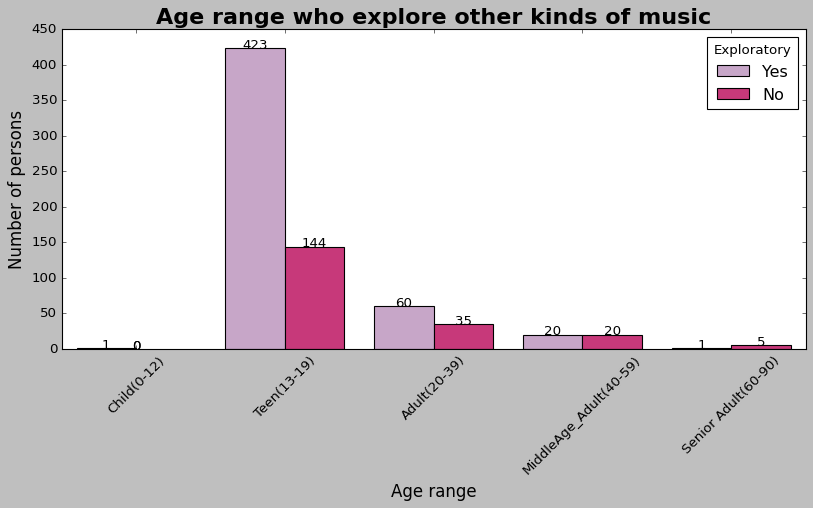

In [162]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='Age_range', hue = 'Exploratory',data=df_clean, palette='PuRd')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
plt.xticks(rotation=45)
plt.title('Age range who explore other kinds of music', weight='bold', fontsize=20)
plt.ylabel('Number of persons', fontsize=15)
plt.xlabel('Age range', fontsize=15)

**Insight:**  Teenagers love to explore new genres.

**3. What source of streming service was used per day in terms of hours and was it while working?**

Text(0.5, 1.0, 'Average Hour Spent on Streaming Services')

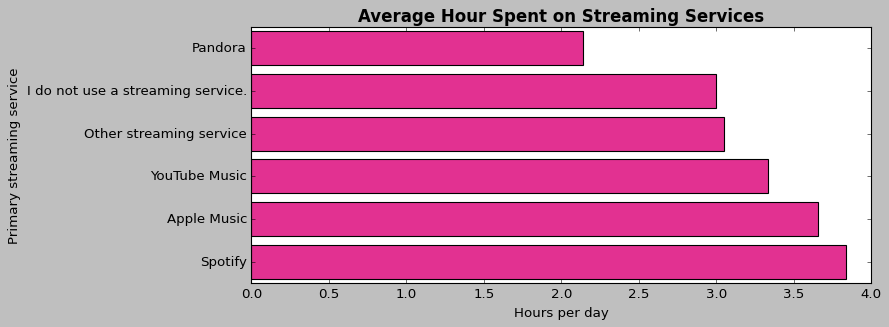

In [92]:
hour_spent = df_clean.groupby('Primary streaming service')['Hours per day'].mean().reset_index()
hour_spent = hour_spent.sort_values('Hours per day', ascending = True)
plt.figure(figsize=(10,4))
sns.barplot(data= hour_spent,x= 'Hours per day', y='Primary streaming service', color ='deeppink')
plt.title('Average Hour Spent on Streaming Services', weight = 'bold', fontsize = 15)

**insights:** Spotify had alot of activity.

**4. How many of our respondents worked?**

Text(0.5, 0, 'Counts of respondents')

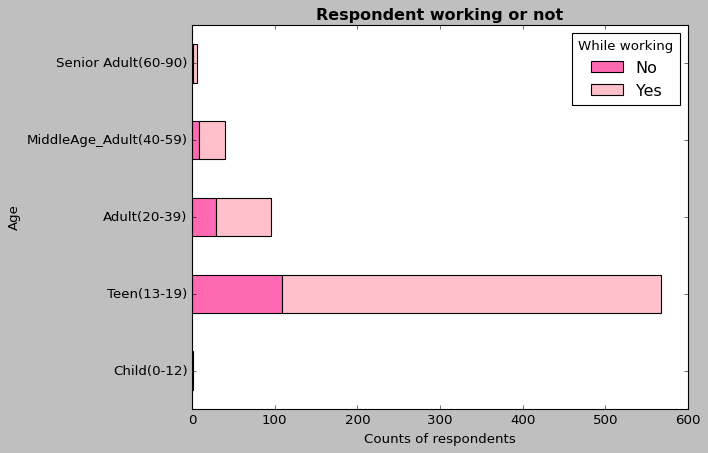

In [55]:
work = df_clean.groupby(['Age_range', 'While working']).size().unstack()
work.plot(kind='barh', stacked = True, color = ['hotpink','pink'])
plt.title('Respondent working or not', weight ='bold')
plt.ylabel('Age',fontsize=12)
plt.xlabel('Counts of respondents',fontsize=12)

**insights:** It seems as tho teenagers had a higher number of people working.

**5. What was the most prefered genre played and what age enjoyed it most?**

Text(0, 0.5, 'Ages')

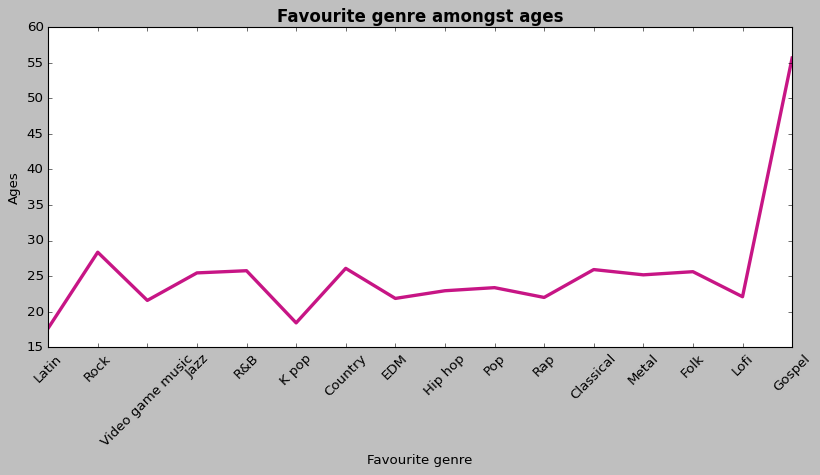

In [164]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Fav genre', y='Age', data=df_clean, errorbar=None, color= 'mediumvioletred', linewidth=3)
plt.title('Favourite genre amongst ages', weight='bold', fontsize=15)
plt.xlabel('Favourite genre')
plt.xticks(rotation=45)
plt.ylabel('Ages')

**insights:** There is a fair interest in different genre amongst youths but there is a significant interest in gospel music by the older generation.

**6. What is the percent of composers and instrumentalists**

Text(0.5, 1.0, 'Percent of Instrumentalist')

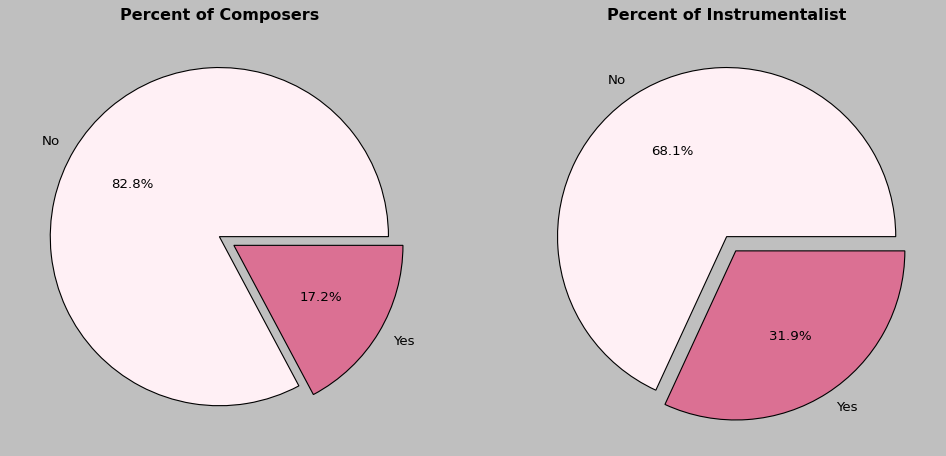

In [57]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
explode = [0, 0.1]
col = ['lavenderblush','palevioletred']

composer_grouped = df_clean['Composer'].value_counts()
instrument_grouped = df_clean['Instrumentalist'].value_counts()

axes[0].pie(composer_grouped, autopct = '%1.1f%%',explode = explode, labels= composer_grouped.index,colors = col)
axes[0].set_title('Percent of Composers',weight='bold')
axes[1].pie(instrument_grouped,autopct = '%1.1f%%',explode = explode,labels = instrument_grouped.index, colors = col)
axes[1].set_title('Percent of Instrumentalist', weight='bold')


**insights:** Only a small fraction are composers. but a higher percent as compared to the composers are instrumentalists.

**7. Did the hours of listening to music have effects on them or not?**

Text(0.5, 0, 'Music effects')

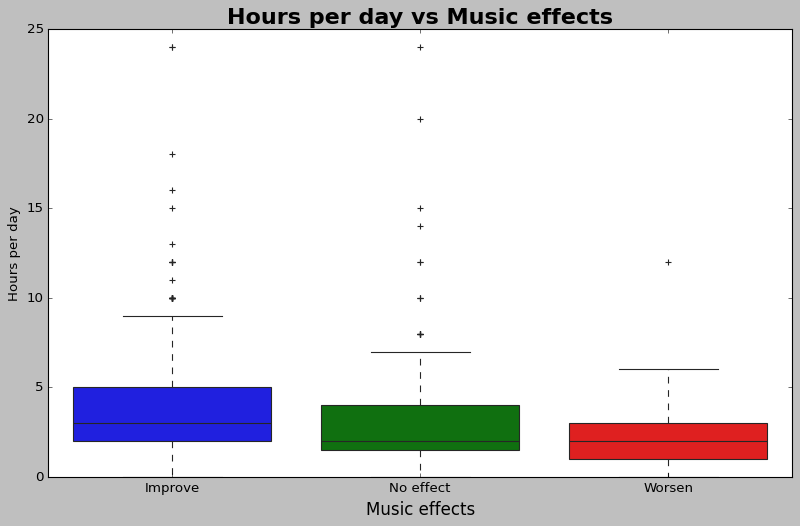

In [65]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Music effects', y='Hours per day', data= df_clean, hue='Music effects')
plt.title('Hours per day vs Music effects', weight='bold', fontsize= 20)
plt.xlabel('Music effects', fontsize=15)

**insights:** Its safe to say that the higher the hours spent listening to music causes an improvement in the overall mental health of the respondent. The respondents whose conditions worsen are due to the fact that they do not take out time to listen to music hence why the effects are worsen.

**8. What is the percentage of our respondent that had these mental health condition?**

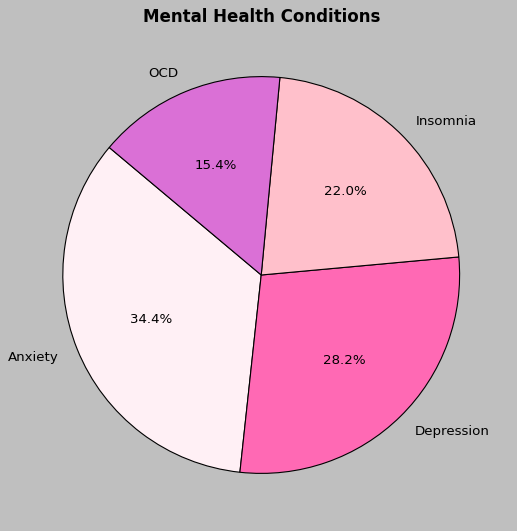

In [176]:
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
mental = [df_clean[columns].sum() for columns in mental_health_columns]
col=['lavenderblush','hotpink','pink','orchid','plum']

plt.figure(figsize=(8,8))
plt.pie(mental, autopct='%1.1f%%', labels=mental_health_columns,startangle=140,colors=col)
plt.title('Mental Health Conditions', weight='bold',fontsize=15)
plt.show()

**Insights:** Anxiety and depression had the highest percent.

**9. Did the music have any effect on the the anxiety, depression and ocd and insomia?**

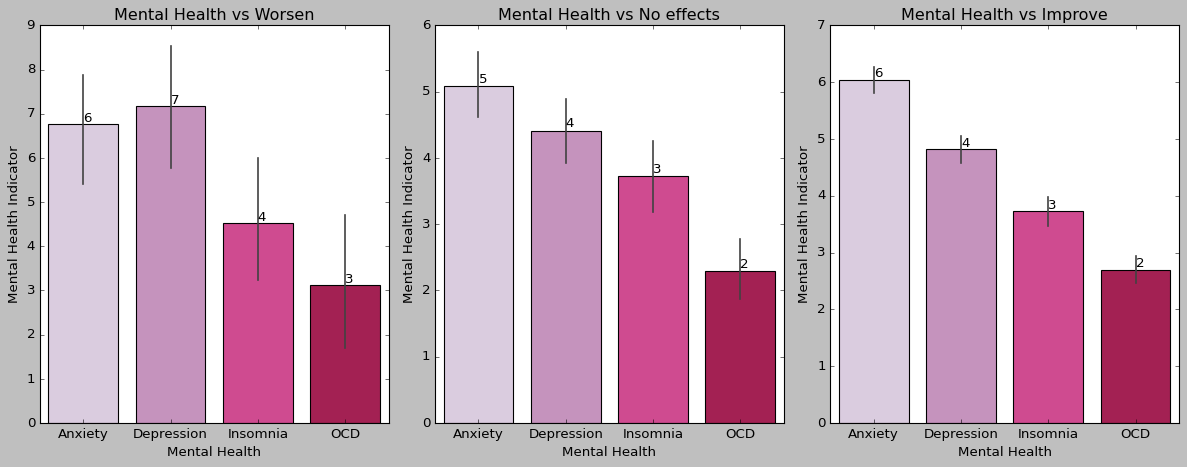

In [177]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
data1= df_clean[(df_clean['Music effects'] == 'Worsen')]
data2 = df_clean[(df_clean['Music effects'] == 'No effect')]
data3 = df_clean[(df_clean['Music effects'] == 'Improve')]

ax = sns.barplot(data1[['Anxiety','Depression','Insomnia','OCD']], ax=axes[0], palette='PuRd')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='left')
axes[0].set_title('Mental Health vs Worsen')
axes[0].set_xlabel('Mental Health')
axes[0].set_ylabel('Mental Health Indicator')
ax = sns.barplot(data2[['Anxiety','Depression','Insomnia','OCD']], ax=axes[1],palette='PuRd')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='left')
axes[1].set_title('Mental Health vs No effects')
axes[1].set_xlabel('Mental Health')
axes[1].set_ylabel('Mental Health Indicator')
ax = sns.barplot(data3[['Anxiety','Depression','Insomnia','OCD']], ax=axes[2],palette='PuRd')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='left')
axes[2].set_title('Mental Health vs Improve')
axes[2].set_xlabel('Mental Health')
axes[2].set_ylabel('Mental Health Indicator')
plt.tight_layout()

**Insights:** There is a fair disparity amongst the various mental health and how music affects it or not.
Music improvement had minimal level of depression, insomnia and ocd but a spike in anxiety
No music effect had a steady increase in the various mental health issues
The worsen effect saw a high number in depression and anxiety.

**10.How was the respondent pace in filling the survey? And did it have any effect on insomnia?**

<ipython-input-168-a852edaf2067>:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



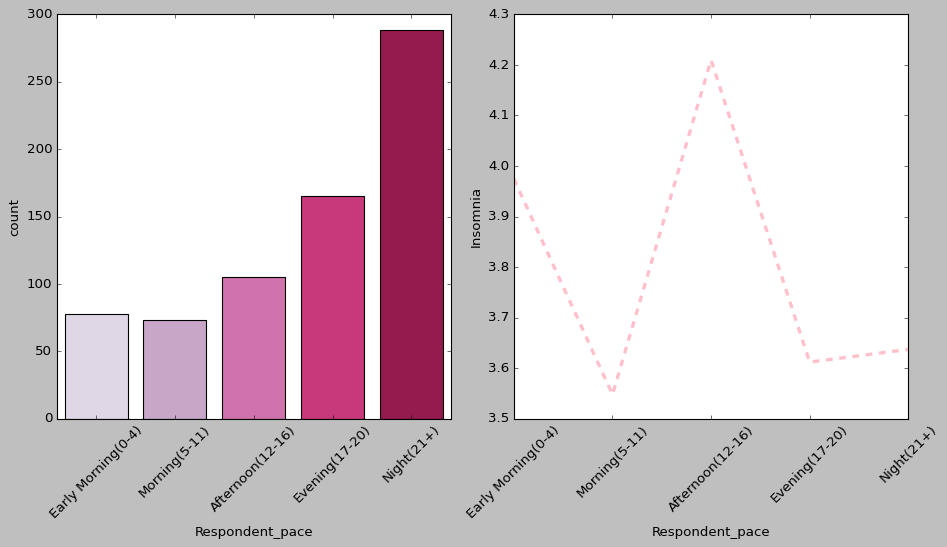

In [168]:
fig, axes = plt.subplots(1,2,figsize=(12,7))

g = sns.countplot(x='Respondent_pace', data=df_clean, ax=axes[0], hue='Respondent_pace',palette='PuRd')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
sns.lineplot(x='Respondent_pace', y='Insomnia', data=df_clean,errorbar=None,ax=axes[1], linestyle='--', linewidth=3, color='pink')
plt.xticks(rotation=45)
plt.tight_layout()

**Insights:** Suprisingly the people who filled the form at night do not seem to have any issue with sleeoing. But people who filled the form in the afternoon have a high number of insomnia.

**11. What was the total hours of the day did it take the respondents to answer or fill in the form?**

Text(0.5, 1.0, 'Total Hours in The Day')

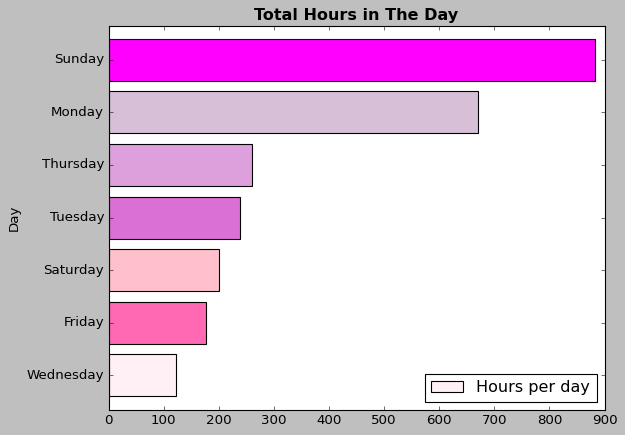

In [173]:
day_group = df_clean.groupby('Day')['Hours per day'].sum().reset_index()

day_group= day_group.sort_values('Hours per day', ascending=True)
col=['lavenderblush','hotpink','pink','orchid','plum','thistle','magenta']
day_group.plot(kind='barh', x='Day', y='Hours per day', color=col, width=0.8)
plt.title('Total Hours in The Day', weight='bold')

**Insights:** Sunday being a weekend had the highest hours when the respondents filled in the survey form. Saturday was suprinsingly low.

#**Recommendation**

1. Teenagers are facing a lot of this mental health challenges and they constitute the bulk of our survey. Hence, it is important for to pay more attention to their kids and not negelect them.

2. People facing these mental health conditions, who has shown that music has no effect helping their condition should really start paying attention to the hours that they spend listening to music. As, music has been shown to reduce depression. So, a reduction in depression might go a long way.

3. People who do not spend more time listening to music, should inbide the culture of exploring other genres.

3. Also, it might be helpful if the act of listening to music is incorportated during their daily activities.

4. It would also be a plus, if the respondents find other ways of handling these mental health challenges such as taking classes to learn new instruments to keep themselves busy, or if they have had a passion for composing music that would also help to keep their minds occupied and busy. So, as not to dwell on whatever emotions they feel.